# Exploratory Data Analysis - Basic

### 자동차 가격에 영향을 미치는 주요 특징 분석

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "clean_df.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,27,Medium,0,1,1,0,1,0,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,27,Medium,0,1,1,0,1,0,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,26,Medium,0,1,1,0,1,0,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,30,Medium,0,1,1,0,1,0,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,22,Medium,0,1,1,0,1,0,1,0


## 시각화 도구를 사용하여 개별 feature의 패턴 분석

### 올바른 시각화 방법을 선택하는 요령 

개별 변수를 시각화 할 때, 다루는 변수의 유형을 먼저 이해하는 것이 중요합니다. 이렇게하면 해당 변수에 대해 올바른 시각화 방법을 찾을 수 있습니다.

In [5]:
# 각 column 의 type 조회
df.dtypes

Unnamed: 0              int64
symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg           float64
price                 float64
city-L/100km          float64
highway-L/100km         int64
horsepower-binned      object
fuel-type-diesel        int64
fuel-type-gas           int64
aspiration-std          int64
aspiration-turbo        int64
aspiration-std.1        int64
aspiration

In [6]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


## 연속 수치 변수 (Continuous numerical variables) 

연속 수치 변수는 어떤 범위 내의 모든 값을 포함 할 수있는 변수입니다. 연속적인 숫자 변수는 "int64"또는 "float64"유형을 가질 수 있습니다. 이러한 변수를 시각화하는 가장 좋은 방법은 맞는 선이있는 산점도를 사용하는 것입니다.

개별 변수와 가격 간의 (선형) 관계를 이해하기 위해, "regplot"을 사용할 수 있습니다.이 "regplot"은 산점도와 데이터에 대한 적합한 회귀 선을 플롯합니다.

### Positive linear relationship

"engine-size" 와 "price" 간의 산점도 작성

<AxesSubplot:xlabel='engine-size', ylabel='price'>

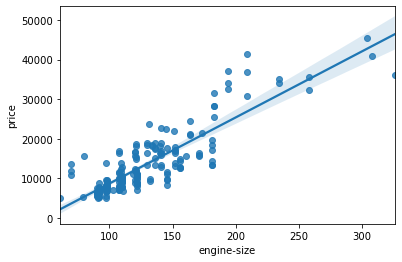

In [11]:
sns.regplot(x="engine-size", y="price", data=df)

엔진 크기가 올라감에 따라 가격이 상승합니다. 이는이 두 변수 간의 직접적인 긍정적 상관 관계를 나타냅니다. 회귀 직선은 거의 완벽한 대각선이므로 엔진 크기는 가격의 좋은 예측 인자처럼 보입니다.

'engine-size'와 'price'사이의 상관 관계를 조사하여 대략 0.87임을 알 수 있습니다.

In [12]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Negative linear relationship

highway-mpg는 가격의 잠재적 예측 변수입니다.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

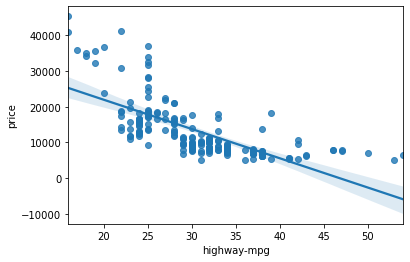

In [13]:
sns.regplot(x="highway-mpg", y="price", data=df)

고속도로 연비 (mpg)가 올라감에 따라 가격이 내려갑니다. 이는이 두 변수 사이의 역 / 음의 관계를 나타냅니다. 하이웨이 mpg는 잠재적으로 가격의 예측 변수가 될 수 있습니다.

'highway-mpg'와 'price'사이의 상관 관계를 살펴보면 약 -0.704가됩니다.

In [14]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Weak Linear Relationship

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

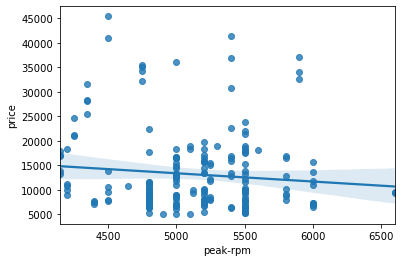

In [15]:
sns.regplot(x="peak-rpm", y="price", data=df)

회귀 직선이 수평에 가깝기 때문에 피크 RPM은 가격의 좋은 예측 지표로 보이지 않습니다. 또한 데이터 포인트가 매우 흩어져 있고 적합 라인에서 멀리 떨어져있어 많은 변동성을 보여줍니다. 따라서 신뢰할 수있는 변수는 아닙니다.

In [16]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

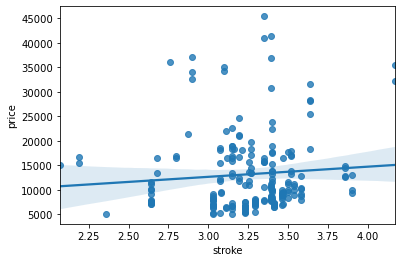

In [18]:
sns.regplot(x="stroke", y="price", data=df)

In [19]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


## 범주형 변수  

- 범주형 변수는 "object"또는 "int64"유형을 가질 수 있습니다.  
- 범주형 변수를 시각화하는 좋은 방법은 상자 그림을 사용하는 것입니다.

<AxesSubplot:xlabel='body-style', ylabel='price'>

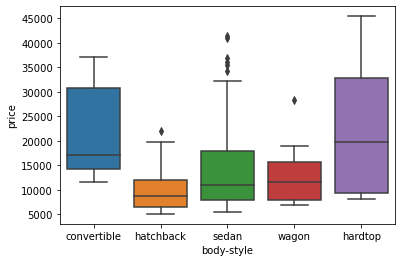

In [20]:
sns.boxplot(x="body-style", y="price", data=df)

우리는 서로 다른 body style 범주 사이의 가격 분포가 중첩되어 있으므로 body-style 이 가격의 좋은 예측 변수가되지는 않을 것이라고 봅니다. 엔진 "engine-location"과 "price" 사이의 관계를 살펴 보겠습니다.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

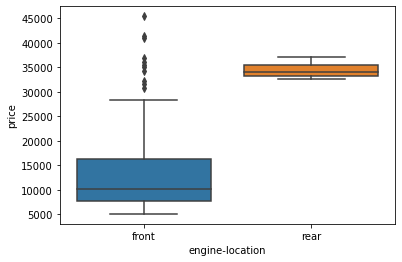

In [21]:
sns.boxplot(x="engine-location", y="price", data=df)

여기서 우리는 앞과 뒤의 두 엔진 위치 카테고리 사이의 가격 분배가 엔진 위치를 가격의 잠재적 인 좋은 예측 변수로 사용할 수있을만큼 충분히 명확하다는 것을 알 수 있습니다.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

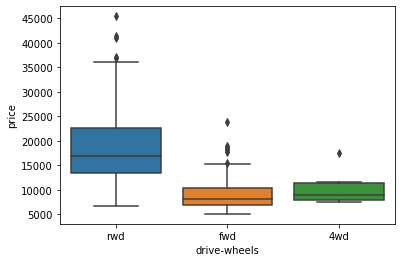

In [22]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

여기서 우리는 다른 drive-wheels 범주 사이의 가격 분배가 다르다는 것을 알 수 있습니다. 이와 같이 drive-wheels은 잠재적으로 가격의 예측 변수가 될 수 있습니다.

## 3. 기술적 통계 분석(Descriptive Statistical Analysis)

- describe() 함수는 모든 연속 변수에 대한 기본 통계를 자동으로 계산합니다. 이 통계에서는 모든 NaN 값이 자동으로 건너 뜁니다.

- 다음과 같이 표시됩니다.
    - 그 변수의 카운트
    - 평균
    - 표준 편차 (표준 편차)
    - 최소치
    - IQR (사분위수 범위 : 25 %, 50 % 및 75 %)
    - 최대치

In [23]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,...,9.944145,30.686567,0.099502,0.900498,0.820896,0.179104,0.820896,0.179104,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,...,2.534599,6.815150,0.300083,0.300083,0.384397,0.384397,0.384397,0.384397,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,4.795918,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,...,7.833333,25.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,...,9.791667,30.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,...,12.368421,34.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,18.076923,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,115


### Value Counts

In [25]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [26]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [27]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


인덱스 이름을 'drive-wheels'로 변경합니다.

In [28]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


`engine-location` 변수에 대해 위의 과정을 반복 합니다.

In [29]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


후륜 자동차 3 개 sample과 전륜 구동 198 개 samle로 편향되어 있어 왜곡 된 결과가 발생할 수 있으므로 엔진 위치에 대해 결론을 내릴 수는 없습니다.

## 4. Basic of Grouping

In [30]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

평균적으로 어떤 유형의 드라이브 휠이 가장 가치 있는지 알고 싶다면 'drive-wheels'를 그룹화 한 다음 평균을 낼 수 있습니다.

In [34]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [41]:
df_group_one = df_group_one.groupby(['drive-wheels']).mean()
df_group_one

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


후륜 구동 차량은 평균적으로 가장 비싸지만 4 륜구동이나 전륜 구동은 가격면에서 거의 동일하다는 것을 알 수 있습니다.

여러 변수로 그룹화 할 수도 있습니다. 예를 들어, 'drive-wheels'과 'body-style'로 그룹화 합니다. 

In [50]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'], as_index=False).mean()
grouped_test1.head()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000


이 그룹화 된 데이터는 피벗 테이블로 만들 때 훨씬 쉽게 시각화됩니다. 피벗 테이블은 Excel 스프레드 시트와 비슷하며 열과 행에 각각 하나씩 변수가 있습니다. pivot 메서드를 사용하여 데이터 프레임을 피벗 테이블로 변환하여 그룹에서 피벗 테이블을 만들 수 있습니다.

이 경우 드라이브 휠 변수를 테이블의 행으로 남겨두고 body-style 을 피벗하여 테이블의 열이됩니다.

In [51]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

흔히 피벗 셀의 일부 데이터가 없습니다. 이러한 누락 된 셀을 값 0으로 채울 수 있지만 다른 값도 사용될 수 있습니다.

In [53]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [54]:
df[["body-style", "price"]].groupby("body-style").mean()

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


#### Variables: Drive Wheels and Body Style vs Price

## Pearson Correlation

Pearson Correlation은 두 변수 X와 Y 간의 선형 의존성을 측정합니다.
결과 계수는 -1과 1 사이의 값이며 다음과 같습니다.
- **1** : 전체 양의 선형 상관 관계,
- **0** : 선형 상관 관계 없음, 두 변수는 서로 영향을주지 않음
- **- 1** : 총 음의 선형 상관 관계.

Pearson Correlation은 "corr"함수의 기본 메소드입니다. 이전과 같이 'int64'또는 'float64'변수의 피어슨 상관 관계를 계산할 수 있습니다.

In [55]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,...,-0.099157,0.020344,0.121454,-0.121454,-0.082739,0.082739,-0.082739,0.082739,-0.082739,0.082739
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,0.066171,0.036233,-0.196735,0.196735,0.054615,-0.054615,0.054615,-0.054615,0.054615,-0.054615
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,0.238567,-0.181877,-0.101546,0.101546,0.006911,-0.006911,0.006911,-0.006911,0.006911,-0.006911
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,0.476153,-0.543304,0.307237,-0.307237,-0.256889,0.256889,-0.256889,0.256889,-0.256889,0.256889
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,0.657373,-0.698142,0.211187,-0.211187,-0.230085,0.230085,-0.230085,0.230085,-0.230085,0.230085
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,0.673363,-0.680635,0.244356,-0.244356,-0.305732,0.305732,-0.305732,0.305732,-0.305732,0.305732
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,0.003811,-0.104812,0.281578,-0.281578,-0.090336,0.090336,-0.090336,0.090336,-0.090336,0.090336
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.785353,-0.794889,0.221046,-0.221046,-0.321955,0.321955,-0.321955,0.321955,-0.321955,0.321955
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.745059,-0.679571,0.070779,-0.070779,-0.110040,0.110040,-0.110040,0.110040,-0.110040,0.110040
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,0.554610,-0.591309,0.054458,-0.054458,-0.227816,0.227816,-0.227816,0.227816,-0.227816,0.227816


## Practice - 맥도날드 메뉴 영양 분석

- 이 데이터 세트는 아침 식사, 소고기 버거, 치킨 및 생선 샌드위치, 감자 튀김, 샐러드, 소다, 커피 및 차, 밀크 셰이크 및 디저트를 포함하여 미국 맥도날드 메뉴의 모든 메뉴 항목에 대한 영양 분석을 제공합니다.

In [56]:
df = pd.read_csv("mcdonals_nutrition.csv")
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [58]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [60]:
df.describe(include='O')

,Category,Item,Serving Size
count,260,260,260
unique,9,260,107
top,Coffee & Tea,Nonfat Caramel Latte (Small),16 fl oz cup
freq,95,1,45


### 어떤 food item 이 가장 sodium 함량이 높은지 분석

In [61]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

### swarmplot - 점이 겹치지 않는 범주형 산점도

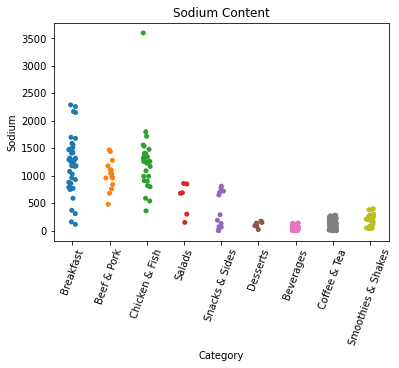

In [77]:
plot = sns.stripplot(x="Category", y="Sodium", data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title("Sodium Content")
plt.show()

- Chicken & Fish Category 에 3500 을 넘는 Sodium 이 있음  --> 어떤 item 인지 탐색

In [78]:
df['Sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

In [79]:
df['Sodium'].idxmax()

82

In [82]:
df.loc[82, ['Item', 'Sodium']]

Item      Chicken McNuggets (40 piece)
Sodium                            3600
Name: 82, dtype: object

### 단백질과 지방과의 상관 관계 탐색

<AxesSubplot:xlabel='Protein', ylabel='Total Fat'>

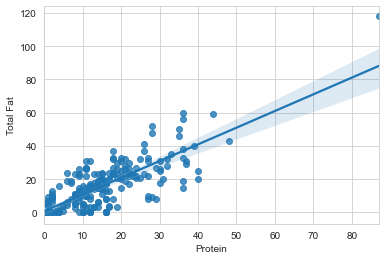

In [85]:
sns.regplot(x="Protein", y='Total Fat', data=df)

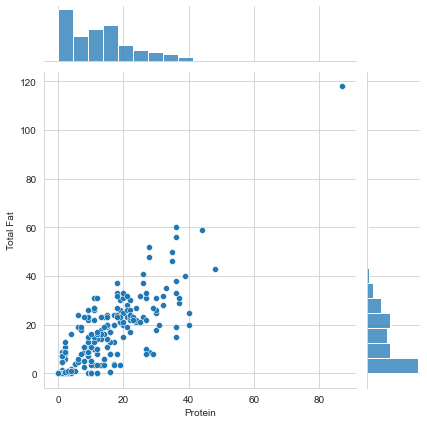

In [86]:
sns.jointplot(x="Protein", y='Total Fat', data=df)
plt.show()